In [1]:
import numpy as np
import scipy.stats as stats
import scipy.special as special
import matplotlib.pyplot as plt

In [65]:
# Simulate an ARIMA(p,d,q) process
length=1000
c=2.0
p=1
d=1
q=1

# White noise std. dev.
sig=1.

# Coefficients of AR terms
#alpha=np.array([])
alpha=np.array([0.4])
#alpha=np.array([0.8,-0.2,0.3,-0.5])


# Coefficients of MA terms
#theta=np.array([])
theta=np.array([-0.3])
#theta=np.array([0.3,0.4,-0.5,-0.6])


# Array for underlying ARMA(p,q) process, Yt, and target process, Xt
yt=np.empty(length+p)
xt=np.empty(length)

# Array of initial values for target process
xtinit=np.empty(d)

# Generate underlying white noise process
wt=np.random.normal(0.,sig,length+q)

# Initial values for the ARMA(p,q) process
for i in range(p):
    yt[i]=np.random.uniform(-1.,1.,1)

# Generate ARMA(p,q) process
for i in range(p,length+p):
    yt[i]=c+wt[i-p+q]
    for j in range(p):
        yt[i]+=alpha[j]*yt[i-1-j]
    for j in range(q):
        yt[i]+=theta[j]*wt[i-p+q-1-j]
        
# Initialise target process for integration
for i in range(length):
    xt[i]=yt[i+p]
    
for i in range(d):
    xtinit[i]=np.random.uniform(-1.,1.,1)
    xt[0]=xtinit[i]
    for j in range(1,length):
        xt[j]=xt[j-1]+xt[j]


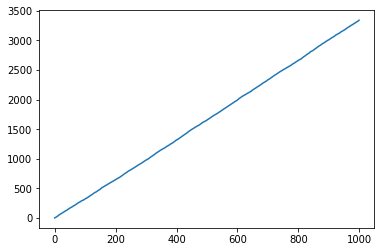

In [66]:
t=np.arange(length)
plt.plot(t,xt)
plt.savefig("ARIMA_1_1_1_alpha0.4_theta-0.3_c2.0.pdf")